# Учим VGG-Unet-with-crop по 3-м каналам с BN на входе
# Предсказываем границу

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF

def get_session(gpu_fraction=0.5):
    '''Assume that you have 6GB of GPU memory and want to allocate ~2GB'''

    num_threads = os.environ.get('OMP_NUM_THREADS')
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)

    if num_threads:
        return tf.Session(config=tf.ConfigProto(
            gpu_options=gpu_options, intra_op_parallelism_threads=num_threads))
    else:
        return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


KTF.set_session(get_session())

Using TensorFlow backend.


In [3]:
!nvidia-smi

Tue Nov 28 11:08:02 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.90                 Driver Version: 384.90                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    68W / 149W |   5807MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [15]:
import os
import re
import json

import unet
import dataset
import train_test_loader
import learning_experiment as lexperiment

import datetime

from shutil import copyfile

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
net = unet.VGGUnetModelWithCrop(N=20)

In [7]:
net.net_description

{'N': 20,
 'input_shape': (324, 324, 3),
 'name': 'vgg-unet-with-crop',
 'output_shape': (116, 116, 1)}

In [16]:
DESCRIPTION = u"""
Учим VGG-Unet-with-crop по 3м каналам RGB с BN на входе
Учим углы!
Experiment_2017_11_28_25
"""
experiment = lexperiment.create_experiment(DESCRIPTION, 
                               dataset.DataSet("./dataset/trainset", [dataset.ChannelRGB_PanSharpen], type_mask=dataset.ONLY_CORNERS))

Create experiment in directory: ./experiments/2017-11-28 11:10:07.492817


In [17]:
data_set = experiment.data_set

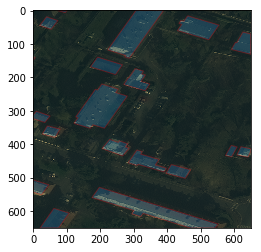

In [10]:
data_set.draw(data_set.test_ids[30])

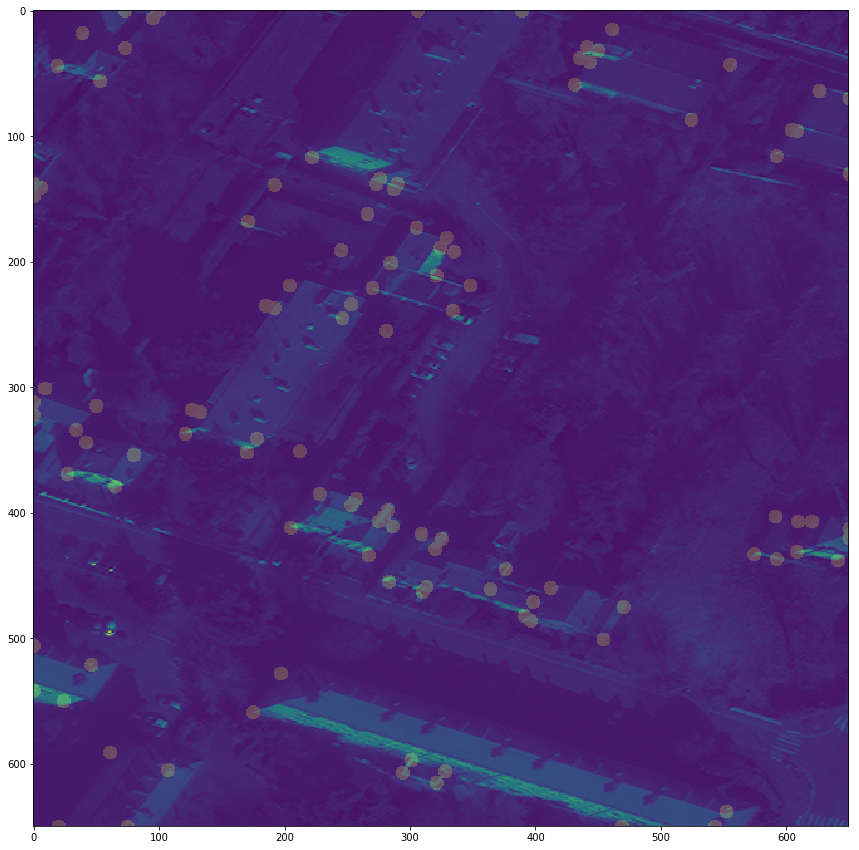

In [18]:
plt.figure(figsize=(15,15))
plt.imshow(data_set.get_ndarray(data_set.test_ids[30])[:,:,0])
plt.imshow(data_set.get_mask(data_set.test_ids[30]), alpha=0.2)

In [19]:
net.load_vgg_weights()

In [21]:
for l in net.vgg_layers:
    l.trainable = False

In [22]:
from keras.optimizers import Adam, Nadam

net.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy')

In [23]:
batch_generator = lexperiment.BatchGenerator(data_set, data_set.train_ids, shuffle_on_each_epoch=True, 
                                             input_size=net.input_shape[1], crop=104, random_rotation_amplitude=5)

In [24]:
experiment.train(net, batch_generator, epochs=30)

epoch: 0, loss: 0.895794
epoch: 0, loss: 0.765536
epoch: 0, loss: 0.645790
epoch: 0, loss: 0.578543
epoch: 0, loss: 0.545602
epoch: 0, loss: 0.422933
epoch: 0, loss: 0.389939
epoch: 0, loss: 0.356664
epoch: 0, loss: 0.300405
epoch: 0, loss: 0.196485
epoch: 0, loss: 0.193869
epoch: 0, loss: 0.119328
epoch: 0, loss: 0.133741
epoch: 0, loss: 0.098313
epoch: 0, loss: 0.132200
epoch: 0, loss: 0.062876
epoch: 0, loss: 0.058496
epoch: 0, loss: 0.082518
epoch: 0, loss: 0.130060
epoch: 0, loss: 0.071201
epoch: 0, loss: 0.034326
epoch: 0, loss: 0.027556
epoch: 0, loss: 0.119812
epoch: 0, loss: 0.026357
epoch: 0, loss: 0.054776
epoch: 0, loss: 0.028020
epoch: 0, loss: 0.073523
epoch: 0, loss: 0.076972
epoch: 0, loss: 0.078107
epoch: 0, loss: 0.042825
epoch: 0, loss: 0.027240
epoch: 0, loss: 0.045901
epoch: 0, loss: 0.042211
epoch: 0, loss: 0.159260
epoch: 0, loss: 0.252559
epoch: 0, loss: 0.045575
epoch: 0, loss: 0.051356
epoch: 0, loss: 0.077423
epoch: 0, loss: 0.068180
epoch: 0, loss: 0.114964


epoch: 5, loss: 0.074325
epoch: 5, loss: 0.032744
epoch: 5, loss: 0.076455
epoch: 5, loss: 0.041176
epoch: 5, loss: 0.026196
epoch: 5, loss: 0.078049
epoch: 5, loss: 0.025594
epoch: 5, loss: 0.015081
epoch: 5, loss: 0.130324
epoch: 5, loss: 0.045177
epoch: 5, loss: 0.077620
epoch: 5, loss: 0.011340
epoch: 5, loss: 0.040289
epoch: 5, loss: 0.051345
epoch: 5, loss: 0.019475
epoch: 5, loss: 0.043116
epoch: 5, loss: 0.035281
epoch: 5, loss: 0.067623
epoch: 5, loss: 0.034052
epoch: 5, loss: 0.023969
epoch: 5, loss: 0.062308
epoch: 5, loss: 0.061796
epoch: 5, loss: 0.092143
epoch: 5, loss: 0.052222
epoch: 5, loss: 0.028764
epoch: 5, loss: 0.136482
epoch: 5, loss: 0.051177
epoch: 5, loss: 0.008112
epoch: 5, loss: 0.028500
epoch: 5, loss: 0.074790
epoch: 5, loss: 0.057395
epoch: 5, loss: 0.024860
epoch: 5, loss: 0.037604
epoch: 5, loss: 0.063935
epoch: 5, loss: 0.012077
epoch: 5, loss: 0.203797
epoch: 5, loss: 0.042713
epoch: 5, loss: 0.052421
epoch: 5, loss: 0.015024
epoch: 5, loss: 0.050444


KeyboardInterrupt: 

In [27]:
net.optimizer.lr.assign(0.2e-4)

<tf.Tensor 'Assign_47:0' shape=() dtype=float32_ref>

In [28]:
experiment.train(net, batch_generator, epochs=30)

epoch: 12, loss: 0.031245
epoch: 12, loss: 0.037300
epoch: 12, loss: 0.005626
epoch: 12, loss: 0.117801
epoch: 12, loss: 0.035555
epoch: 12, loss: 0.059947
epoch: 12, loss: 0.055043
epoch: 12, loss: 0.020645
epoch: 12, loss: 0.070094
epoch: 12, loss: 0.030397
epoch: 12, loss: 0.025777
epoch: 12, loss: 0.011364
epoch: 12, loss: 0.061492
epoch: 12, loss: 0.040394
epoch: 12, loss: 0.050416
epoch: 12, loss: 0.031910
epoch: 12, loss: 0.025527
epoch: 12, loss: 0.065031
epoch: 12, loss: 0.041147
epoch: 12, loss: 0.046893
epoch: 12, loss: 0.046503
epoch: 12, loss: 0.022866
epoch: 12, loss: 0.049770
epoch: 12, loss: 0.050398
epoch: 12, loss: 0.012996
epoch: 12, loss: 0.040824
epoch: 12, loss: 0.025269
epoch: 12, loss: 0.042213
epoch: 12, loss: 0.022579
epoch: 12, loss: 0.037718
epoch: 12, loss: 0.088557
epoch: 12, loss: 0.053936
epoch: 12, loss: 0.033866
epoch: 12, loss: 0.019809
epoch: 12, loss: 0.023767
epoch: 12, loss: 0.074754
epoch: 12, loss: 0.043753
epoch: 12, loss: 0.033488
epoch: 12, l

epoch: 16, loss: 0.088930
epoch: 16, loss: 0.024578
epoch: 16, loss: 0.021663
epoch: 16, loss: 0.028457
epoch: 16, loss: 0.062206
epoch: 16, loss: 0.047744
epoch: 16, loss: 0.013802
epoch: 16, loss: 0.021873
epoch: 16, loss: 0.172284
epoch: 17, loss: 0.018227
epoch: 17, loss: 0.013354
epoch: 17, loss: 0.055239
epoch: 17, loss: 0.062985
epoch: 17, loss: 0.067544
epoch: 17, loss: 0.051496
epoch: 17, loss: 0.020080
epoch: 17, loss: 0.060568
epoch: 17, loss: 0.031852
epoch: 17, loss: 0.028296
epoch: 17, loss: 0.012051
epoch: 17, loss: 0.040401
epoch: 17, loss: 0.003431
epoch: 17, loss: 0.073411
epoch: 17, loss: 0.099568
epoch: 17, loss: 0.015505
epoch: 17, loss: 0.024861
epoch: 17, loss: 0.015225
epoch: 17, loss: 0.128882
epoch: 17, loss: 0.027962
epoch: 17, loss: 0.062772
epoch: 17, loss: 0.095860
epoch: 17, loss: 0.045167
epoch: 17, loss: 0.022747
epoch: 17, loss: 0.030214
epoch: 17, loss: 0.029035
epoch: 17, loss: 0.037547
epoch: 17, loss: 0.063145
epoch: 17, loss: 0.070742
epoch: 17, l

KeyboardInterrupt: 